In [1]:
import pandas as pd

data = pd.read_csv("Mall_Customers.csv")

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=0.5,
    min_samples=5
)

clusters = dbscan.fit_predict(X_scaled)

data['Cluster'] = clusters


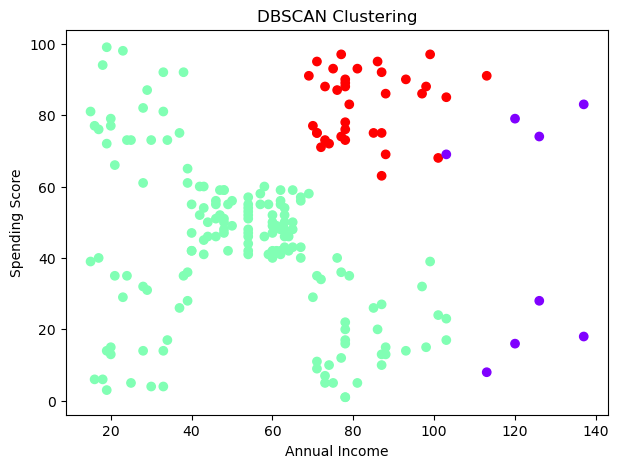

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(
    data['Annual Income (k$)'],
    data['Spending Score (1-100)'],
    c=data['Cluster'],
    cmap='rainbow'
)
plt.title("DBSCAN Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


In [5]:
from sklearn.metrics import silhouette_score

mask = clusters != -1
silhouette = silhouette_score(X_scaled[mask], clusters[mask])
print("Silhouette Score:", silhouette)


Silhouette Score: 0.3875583892728279
